In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [7]:
Data = pd.read_csv("Data/CAR DETAILS FROM CAR DEKHO.csv")
Data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
Data.info()
Data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


# Name Vehicles

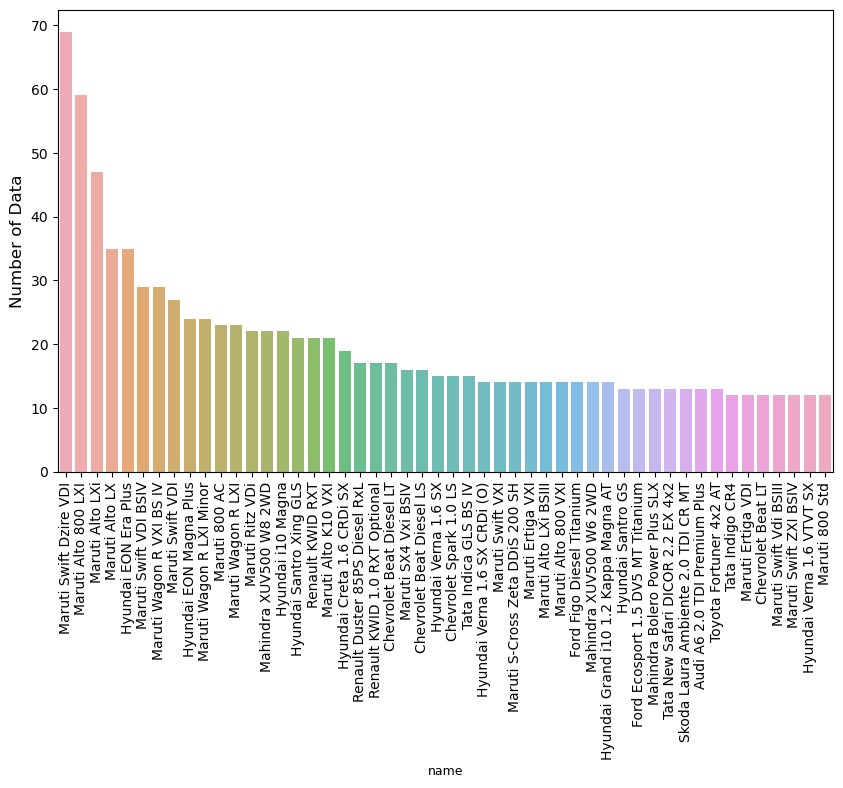

In [13]:
cnt_pro = Data['name'].value_counts()[:50]
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('name', fontsize=9)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()

# owner 

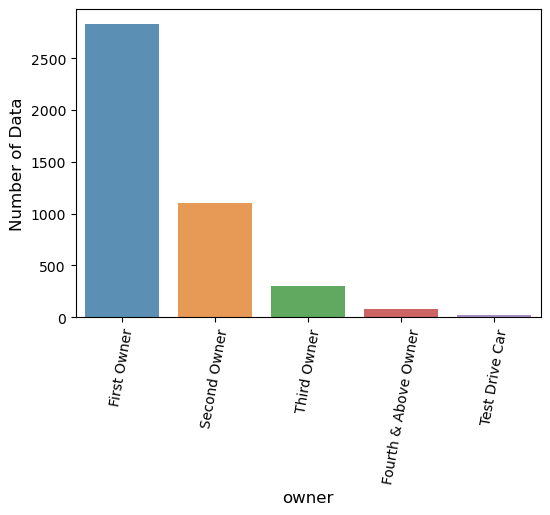

In [15]:
cnt_pro = Data['owner'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('owner', fontsize=12)
plt.xticks(rotation=80)
plt.show();

# seller_type

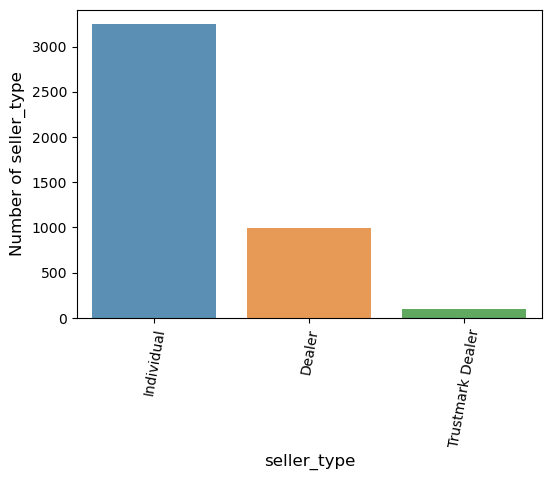

In [16]:
cnt_pro = Data['seller_type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x = cnt_pro.index,y=  cnt_pro.values, alpha=0.8)
plt.ylabel('Number of seller_type', fontsize=12)
plt.xlabel('seller_type', fontsize=12)
plt.xticks(rotation=80)
plt.show();

# The selling price of vehicle

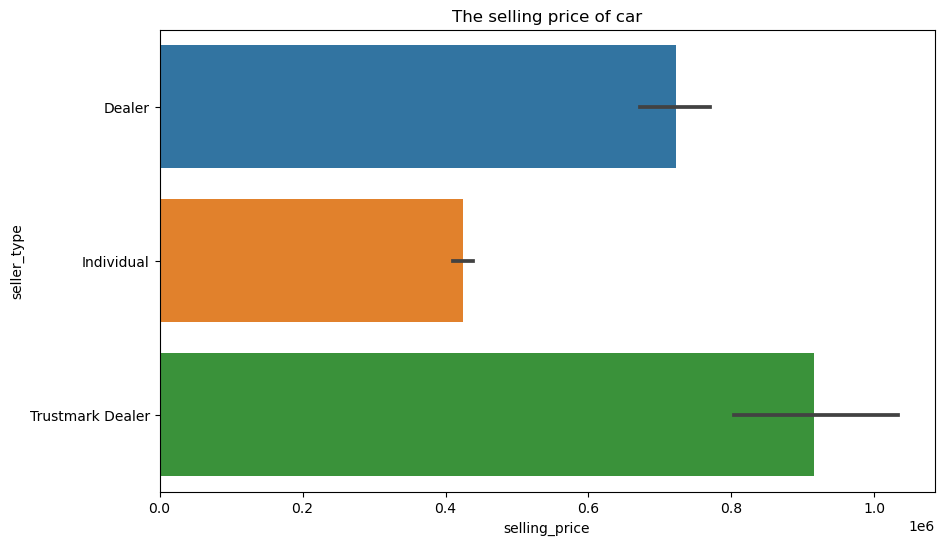

In [17]:
top_sell = Data.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.seller_type, x=top_sell.selling_price)
plt.xticks()
plt.xlabel('selling_price')
plt.ylabel('seller_type')
plt.title('The selling price of car')
plt.show()

As you can see on the figure above, we know that car who sell by Dealer and Trustmark Dealer has higher selling price than sell by Individual

# The selling price by vehicle year

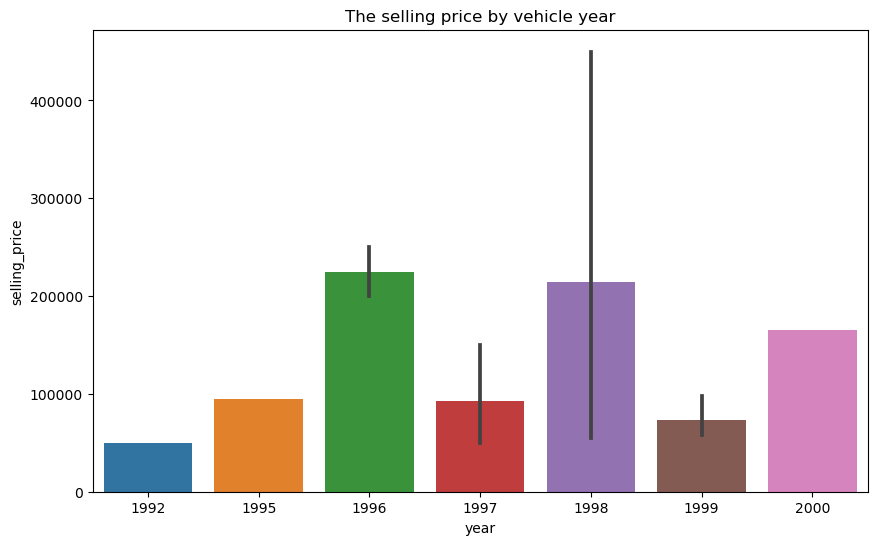

In [18]:
top_sell = Data.sort_values(by='year', ascending=True)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.selling_price, x=top_sell.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show()

# Comparing the selling price vehicle

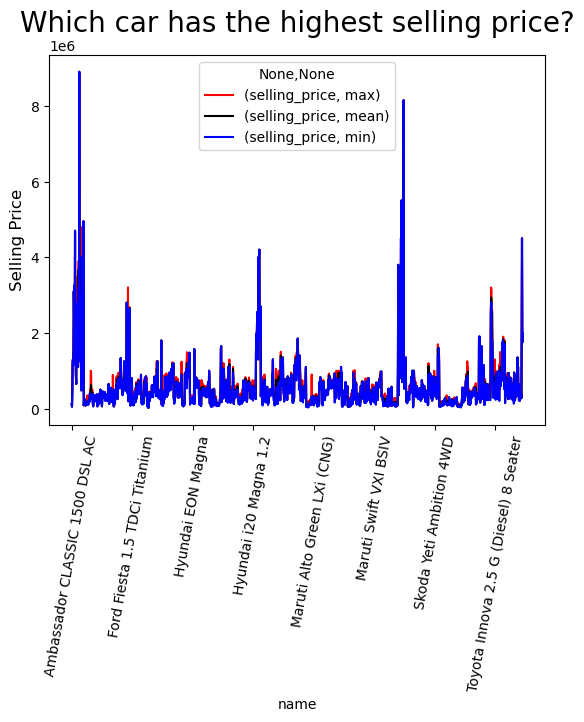

History's Best Selling Vehicles


,name,selling_price
3912,Ambassador CLASSIC 1500 DSL AC,120000
2878,Ambassador Classic 2000 Dsz,50000
3465,Ambassador Grand 1800 ISZ MPFI PW CL,430000
3458,Audi A4 1.8 TFSI,1200000
3094,Audi A4 2.0 TDI,1295000
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,1150000
554,Audi A4 3.0 TDI Quattro,1580000
1065,Audi A4 30 TFSI Technology,3100000
1410,Audi A4 35 TDI Premium,2300000
1479,Audi A4 35 TDI Premium Plus,3256000


In [20]:
# Displaying max, min, and average selling prices of each vehicle
display(Data[["name", "selling_price"]].groupby(["name"]).agg(["max", 'mean', "min"]).style.background_gradient(cmap="Blues"))

# Plotting max, min, and average selling prices using line plot
Data[["name", "selling_price"]].groupby(["name"]).agg(["max", 'mean', "min"]).plot(kind="line", color=["red", "black", "blue"])
plt.title("Which car has the highest selling price?", fontsize=20)
plt.ylabel("Selling Price", fontsize=12) 
plt.xticks(rotation=80)  # Rotate x-axis labels for better visibility
plt.show()

# Displaying history's best selling vehicles
print("History's Best Selling Vehicles")
display(Data.loc[Data.groupby(Data["name"])["selling_price"].idxmax()][["name", "selling_price"]].style.background_gradient(cmap="copper"))

# Time series selling price vehicles


time series selling price cars


,,selling_price
name,year,
BMW X5 xDrive 30d xLine,2019,54450000
Mercedes-Benz C-Class Progressive C 220d,2018,41800000
Toyota Fortuner 4x2 AT,2017,31195000
Audi A4 3.0 TDI Quattro,2013,18960000
Audi A6 2.0 TDI Premium Plus,2013,14300000
Maruti Swift Dzire VDI,2017,10893000
Hyundai Creta 1.6 CRDi SX,2016,10178999
Hyundai Verna 1.6 VTVT SX,2015,9120000
Maruti S-Cross Zeta DDiS 200 SH,2015,9000000


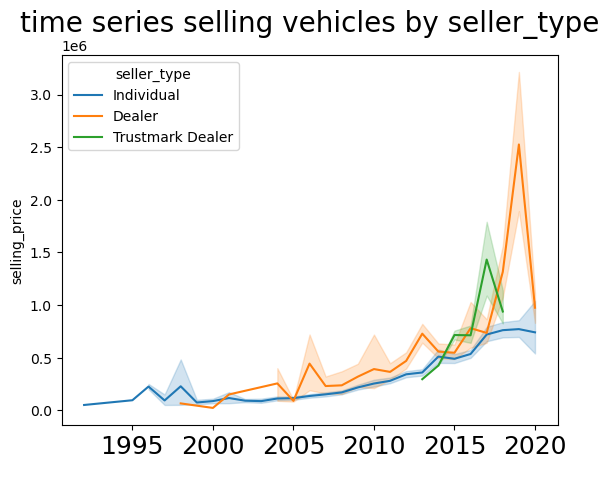

In [22]:
Data['year'] = Data["year"].astype("int")
print('time series selling price cars')
display(Data[["year",'name','selling_price']].groupby(["name",
                                                         "year"]).agg("sum").sort_values(by="selling_price",
                                                          ascending = False).head(10).style.background_gradient(cmap='Greens'))
# here we are plotting them
sns.lineplot(x = Data["year"],y = Data['selling_price'],hue=Data["seller_type"])
plt.title("time series selling vehicles by seller_type",fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel(" ")
plt.show()


C:\Users\saish\AppData\Local\Temp\ipykernel_21588\1433441766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Data.corr()


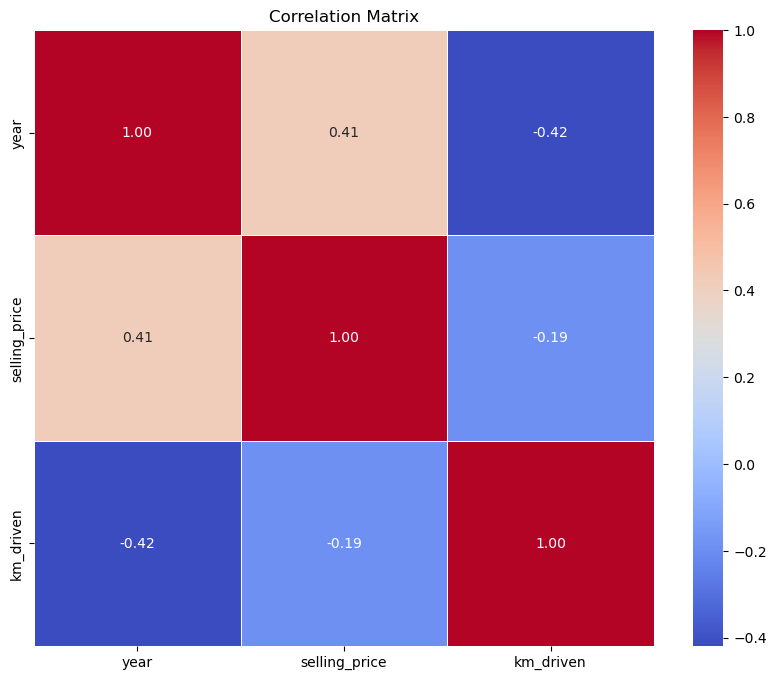

In [27]:
correlation_matrix = Data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

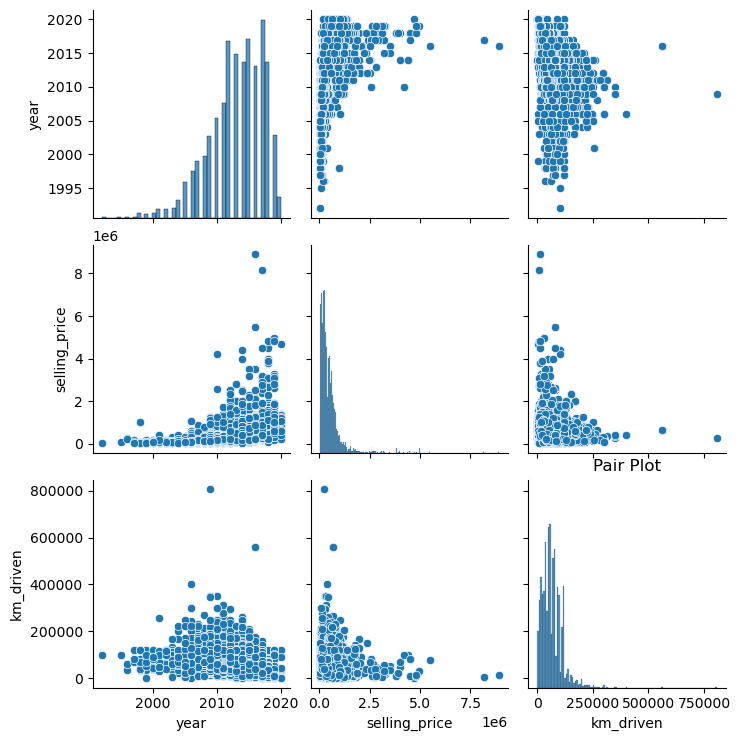

In [29]:
sns.pairplot(Data)
plt.title('Pair Plot')
plt.show()


### 7 Things You Need to Know Before Buying a Vehicle

When purchasing a car, it's essential to consider more than just financial aspects. Understanding various details about the vehicle can help you make a well-informed decision. Here are seven key factors to consider:

1. **Type of Car**: Determine the specific type of car that meets your needs, such as sedan, SUV, hatchback, etc.

2. **Year**: Take note of the vehicle's manufacturing year to assess its age and potential depreciation.

3. **Transmission**: Understand whether the car has manual or automatic transmission, based on your preference and driving comfort.

4. **Kilometers Driven (km_driven)**: Evaluate the distance the vehicle has been driven to gauge its usage and potential wear and tear.

5. **Fuel Type**: Identify the type of fuel the car utilizes, such as petrol, diesel, electric, or hybrid, to estimate running costs and environmental impact.

6. **Seller Type**: Consider whether you're purchasing the vehicle from a dealer or an individual seller. Dealers and Trustmark Dealers often offer higher selling prices compared to transactions with individual sellers.

7. **Selling Price**: Lastly, analyze the selling price of the vehicle to ensure it aligns with your budget and the market value for similar models.

By paying attention to these factors, you can make a more informed decision and choose a vehicle that suits your requirements and preferences.

--- 



,name,transmission,year,km_driven,fuel,seller_type,selling_price
3872,Audi RS7 2015-2019 Sportback Performance,Automatic,2016,13000,Petrol,Dealer,8900000
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,Automatic,2017,6500,Diesel,Dealer,8150000
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,Automatic,2016,77350,Diesel,Dealer,5500000
919,BMW X5 xDrive 30d xLine,Automatic,2019,30000,Diesel,Dealer,4950000
593,BMW X5 xDrive 30d xLine,Automatic,2019,30000,Diesel,Dealer,4950000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Automatic,2014,100000,Diesel,Individual,4400000
2178,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Automatic,2014,100000,Diesel,Individual,4400000
163,Jaguar XJ 5.0 L V8 Supercharged,Automatic,2010,40000,Petrol,Individual,2550000
4224,Toyota Fortuner 2.7 2WD AT,Automatic,2016,70000,Petrol,Individual,2500000
836,Mercedes-Benz M-Class ML 350 CDI,Automatic,2014,79500,Diesel,Individual,2500000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
1410,Audi A4 35 TDI Premium,Automatic,2015,35000,Diesel,Individual,2300000
3320,Volvo XC60 D3 Kinetic,Automatic,2012,115992,Diesel,Dealer,1750000
44,Audi Q7 35 TDI Quattro Premium,Automatic,2009,78000,Diesel,Dealer,1250000
4049,Hyundai Creta 1.6 CRDi SX Plus,Manual,2016,60000,Diesel,Individual,1249000
1057,Skoda Octavia Elegance 2.0 TDI AT,Automatic,2014,135000,Diesel,Individual,1200000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
236,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Manual,2010,163000,Diesel,Individual,700000
957,Mahindra Scorpio M2DI,Manual,2012,110000,Diesel,Individual,600000
818,Maruti Ertiga ZDI,Manual,2012,120000,Diesel,Individual,480000
2955,Toyota Innova 2.5 G4 Diesel 7-seater,Manual,2007,223000,Diesel,Individual,440000
986,Ford Endeavour Hurricane Limited Edition,Automatic,2007,110000,Diesel,Individual,400000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
2359,Volkswagen Vento 1.5 TDI Highline BSIV,Manual,2019,5400,Diesel,Dealer,1350000
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,Manual,2020,1010,Diesel,Dealer,1334000
1780,Ford Ecosport Thunder Edition Diesel,Manual,2020,1010,Diesel,Dealer,1331000
3615,Honda City i-VTEC CVT ZX,Automatic,2018,13000,Petrol,Dealer,1165000
1775,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,Manual,2020,1010,Petrol,Dealer,1119000


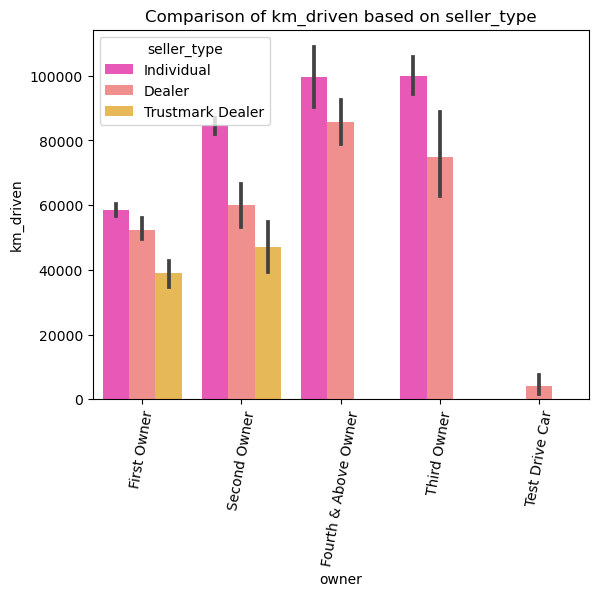

In [24]:

# Displaying the top 5 highest selling prices for cars based on different owner types
for owner_type in ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"]:
    display(Data[Data["owner"]==owner_type][["name","transmission","year","km_driven","fuel","seller_type",
                                           "selling_price"]].sort_values(by="selling_price", ascending=False).head(5).style.background_gradient(cmap="spring"))

# Creating a bar plot to compare km_driven based on seller_type and owner
sns.barplot(x=Data["owner"], y=Data["km_driven"], hue=Data["seller_type"], palette="spring")
plt.xticks(rotation=80)
plt.title("Comparison of km_driven based on seller_type")
plt.show()

# Recommending Vehicles Based on Fuel


In [12]:
def recommend_vehicle(x):
    y = Data[["fuel",'name',"km_driven","transmission","selling_price"]][Data["fuel"] == x]
    y = y.sort_values(by="selling_price",ascending=False)
    return y.head(15)

# Diesel

In [13]:
recommend_vehicle("Diesel")

,fuel,name,km_driven,transmission,selling_price
89,Diesel,Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500,Automatic,8150000
3969,Diesel,Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350,Automatic,5500000
919,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
612,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
593,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
2239,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
2258,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
1836,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
574,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
2739,Diesel,BMW X5 xDrive 30d xLine,30000,Automatic,4950000


# Petrol

In [14]:
recommend_vehicle("Petrol")

,fuel,name,km_driven,transmission,selling_price
3872,Petrol,Audi RS7 2015-2019 Sportback Performance,13000,Automatic,8900000
2580,Petrol,Mercedes-Benz E-Class Exclusive E 200 BSIV,9800,Automatic,4500000
101,Petrol,Mercedes-Benz E-Class Exclusive E 200 BSIV,9800,Automatic,4500000
988,Petrol,Land Rover Discovery S 2.0 SD4,68000,Automatic,4000000
1065,Petrol,Audi A4 30 TFSI Technology,22000,Automatic,3100000
2323,Petrol,Audi A4 30 TFSI Technology,22000,Automatic,3100000
163,Petrol,Jaguar XJ 5.0 L V8 Supercharged,40000,Automatic,2550000
4224,Petrol,Toyota Fortuner 2.7 2WD AT,70000,Automatic,2500000
2175,Petrol,Jaguar XF 5.0 Litre V8 Petrol,66363,Automatic,2050000
536,Petrol,Jaguar XF 5.0 Litre V8 Petrol,66363,Automatic,2050000


# CNG

In [15]:
recommend_vehicle("CNG")

,fuel,name,km_driven,transmission,selling_price
4076,CNG,Maruti Ertiga VXI CNG,56600,Manual,595000
3464,CNG,Maruti Ertiga VXI CNG,80000,Manual,587000
712,CNG,Maruti Ertiga VXI CNG,56228,Manual,525000
2785,CNG,Hyundai Santro Magna CNG BSIV,10000,Manual,520000
3112,CNG,Maruti Eeco CNG 5 Seater AC BSIV,7000,Manual,495000
3778,CNG,Maruti Eeco CNG 5 Seater AC BSIV,4000,Manual,470000
3048,CNG,Maruti Eeco CNG 5 Seater AC BSIV,10000,Manual,470000
4063,CNG,Maruti Eeco 5 STR With AC Plus HTR CNG,14100,Manual,440000
4140,CNG,Maruti Eeco 5 STR With AC Plus HTR CNG,45000,Manual,409999
22,CNG,Maruti Celerio Green VXI,78000,Manual,365000


# LPG

In [16]:
recommend_vehicle("LPG")

,fuel,name,km_driven,transmission,selling_price
1435,LPG,Hyundai i10 Magna LPG,29000,Manual,290000
1998,LPG,Hyundai i10 Magna LPG,90000,Manual,275000
495,LPG,Hyundai Santro Xing GLS Audio LPG,100000,Manual,250000
657,LPG,Hyundai i10 Magna LPG,88600,Manual,250000
3752,LPG,Hyundai EON LPG Magna Plus,110000,Manual,240000
2380,LPG,Maruti Wagon R Duo Lxi,50000,Manual,240000
703,LPG,Hyundai Santro Xing GL Plus LPG,60000,Manual,229999
1355,LPG,Maruti Wagon R LXI LPG BSIV,80000,Manual,220000
157,LPG,Maruti Wagon R DUO LPG,90000,Manual,210000
3341,LPG,Chevrolet Beat LT LPG,110000,Manual,200000


# Electric

In [17]:
recommend_vehicle("Electric")

,fuel,name,km_driven,transmission,selling_price
4145,Electric,Toyota Camry Hybrid,62000,Automatic,310000


# Recommending Vehicles Based on Owner

In [18]:
def recommend_vehicle(x):
    y = Data[["owner",'name',"km_driven","transmission","selling_price"]][Data["owner"] == x]
    y = y.sort_values(by="selling_price",ascending=False)
    return y.head(15)

# First Owner

In [19]:
recommend_vehicle("First Owner")

,owner,name,km_driven,transmission,selling_price
3872,First Owner,Audi RS7 2015-2019 Sportback Performance,13000,Automatic,8900000
89,First Owner,Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500,Automatic,8150000
3969,First Owner,Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350,Automatic,5500000
919,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
593,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
1023,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
2739,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
1836,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
612,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
2258,First Owner,BMW X5 xDrive 30d xLine,30000,Automatic,4950000


# Second Owner

In [20]:
recommend_vehicle("Second Owner")

,owner,name,km_driven,transmission,selling_price
539,Second Owner,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,100000,Automatic,4400000
2178,Second Owner,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,100000,Automatic,4400000
163,Second Owner,Jaguar XJ 5.0 L V8 Supercharged,40000,Automatic,2550000
4224,Second Owner,Toyota Fortuner 2.7 2WD AT,70000,Automatic,2500000
836,Second Owner,Mercedes-Benz M-Class ML 350 CDI,79500,Automatic,2500000
3596,Second Owner,Land Rover Range Rover Evoque 2.2L Dynamic,149000,Automatic,2349000
536,Second Owner,Jaguar XF 5.0 Litre V8 Petrol,66363,Automatic,2050000
2175,Second Owner,Jaguar XF 5.0 Litre V8 Petrol,66363,Automatic,2050000
1417,Second Owner,Jaguar XF 3.0 Litre S Premium Luxury,64000,Automatic,2000000
1532,Second Owner,Jaguar XF 3.0 Litre S Premium Luxury,50000,Automatic,1800000


# Third Owner

In [21]:
recommend_vehicle("Third Owner")

,owner,name,km_driven,transmission,selling_price
1410,Third Owner,Audi A4 35 TDI Premium,35000,Automatic,2300000
3320,Third Owner,Volvo XC60 D3 Kinetic,115992,Automatic,1750000
44,Third Owner,Audi Q7 35 TDI Quattro Premium,78000,Automatic,1250000
4049,Third Owner,Hyundai Creta 1.6 CRDi SX Plus,60000,Manual,1249000
1057,Third Owner,Skoda Octavia Elegance 2.0 TDI AT,135000,Automatic,1200000
1362,Third Owner,Toyota Innova 2.5 VX (Diesel) 7 Seater,70000,Manual,1200000
3458,Third Owner,Audi A4 1.8 TFSI,60000,Automatic,1200000
2216,Third Owner,Skoda Octavia Elegance 2.0 TDI AT,135000,Automatic,1200000
2315,Third Owner,Skoda Octavia Elegance 2.0 TDI AT,135000,Automatic,1200000
2910,Third Owner,BMW 5 Series 525d Sedan,45000,Automatic,1200000


# Fourth & Above Owner

In [22]:
recommend_vehicle("Fourth & Above Owner")

,owner,name,km_driven,transmission,selling_price
236,Fourth & Above Owner,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,163000,Manual,700000
957,Fourth & Above Owner,Mahindra Scorpio M2DI,110000,Manual,600000
818,Fourth & Above Owner,Maruti Ertiga ZDI,120000,Manual,480000
2955,Fourth & Above Owner,Toyota Innova 2.5 G4 Diesel 7-seater,223000,Manual,440000
986,Fourth & Above Owner,Ford Endeavour Hurricane Limited Edition,110000,Automatic,400000
1215,Fourth & Above Owner,Mahindra Bolero SLX 2WD BSIII,150000,Manual,390000
3982,Fourth & Above Owner,Chevrolet Cruze LT,90000,Manual,380000
1608,Fourth & Above Owner,Volkswagen Vento New Diesel Highline,86000,Manual,330000
1633,Fourth & Above Owner,Maruti Swift VDI BSIV,110000,Manual,320000
1040,Fourth & Above Owner,Honda City VTEC,90000,Manual,310000


# Test Drive Car

In [23]:
recommend_vehicle("Test Drive Car")

,owner,name,km_driven,transmission,selling_price
2359,Test Drive Car,Volkswagen Vento 1.5 TDI Highline BSIV,5400,Manual,1350000
1778,Test Drive Car,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,1010,Manual,1334000
1780,Test Drive Car,Ford Ecosport Thunder Edition Diesel,1010,Manual,1331000
3615,Test Drive Car,Honda City i-VTEC CVT ZX,13000,Automatic,1165000
1775,Test Drive Car,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,1010,Manual,1119000
1795,Test Drive Car,Ford Ecosport 1.5 Petrol Titanium Plus,5166,Manual,1100000
1777,Test Drive Car,Ford Ecosport 1.5 Petrol Trend,1010,Manual,1030000
1716,Test Drive Car,Ford Ecosport 1.5 Diesel Titanium,101,Manual,1000000
2362,Test Drive Car,Ford Figo Aspire Titanium Plus Diesel,13000,Manual,894999
1781,Test Drive Car,Ford Freestyle Titanium Plus,1010,Manual,852000


# Recommending Vehicles Based on Seller Type

In [24]:
def recommend_vehicle(x):
    y = Data[["seller_type",'name',"km_driven","transmission","selling_price"]][Data["seller_type"] == x]
    y = y.sort_values(by="selling_price",ascending=False)
    return y.head(15)

# Individual

In [25]:
recommend_vehicle("Individual")

,seller_type,name,km_driven,transmission,selling_price
3453,Individual,BMW 5 Series 520d Luxury Line,9422,Automatic,4800000
963,Individual,Audi A5 Sportback,1500,Automatic,4700000
4047,Individual,Volvo XC 90 D5 Inscription BSIV,80000,Automatic,4500000
539,Individual,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,100000,Automatic,4400000
2178,Individual,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,100000,Automatic,4400000
968,Individual,BMW 7 Series Signature 730Ld,47000,Automatic,4000000
731,Individual,Land Rover Discovery Sport TD4 HSE 7S,68000,Automatic,4000000
988,Individual,Land Rover Discovery S 2.0 SD4,68000,Automatic,4000000
1705,Individual,Audi Q5 2.0 TDI,35000,Automatic,3500000
2503,Individual,Ford Endeavour 3.2 Titanium AT 4X4,20000,Automatic,3200000


# Dealer

In [26]:
recommend_vehicle("Dealer")

,seller_type,name,km_driven,transmission,selling_price
3872,Dealer,Audi RS7 2015-2019 Sportback Performance,13000,Automatic,8900000
89,Dealer,Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500,Automatic,8150000
3969,Dealer,Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350,Automatic,5500000
2258,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
555,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
919,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
1023,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
612,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
1836,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000
593,Dealer,BMW X5 xDrive 30d xLine,30000,Automatic,4950000


# Trustmark Dealer

In [27]:
recommend_vehicle("Trustmark Dealer")

,seller_type,name,km_driven,transmission,selling_price
927,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
563,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
1031,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
908,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
2747,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
620,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
601,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
582,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
2266,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
1844,Trustmark Dealer,Toyota Fortuner 4x2 AT,47162,Automatic,2600000
